In [28]:
import numpy as np

In [29]:
#load data from npz file
#load training data 
train_data = np.load('X_kannada_MNIST_train.npz')
x_train =  train_data['arr_0'] #each array gets assigned a key (usually 'arr_0', 'arr_1', and so on) 

train_label = np.load('y_kannada_MNIST_train.npz')
y_train = train_label['arr_0']


#load test data 
test_data = np.load('X_kannada_MNIST_test.npz')
x_test = test_data['arr_0']

test_label = np.load('y_kannada_MNIST_test.npz')
y_test = test_label['arr_0']

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
y_test.shape

(10000,)

In [34]:
import matplotlib_inline
import matplotlib
import matplotlib.pyplot as plt

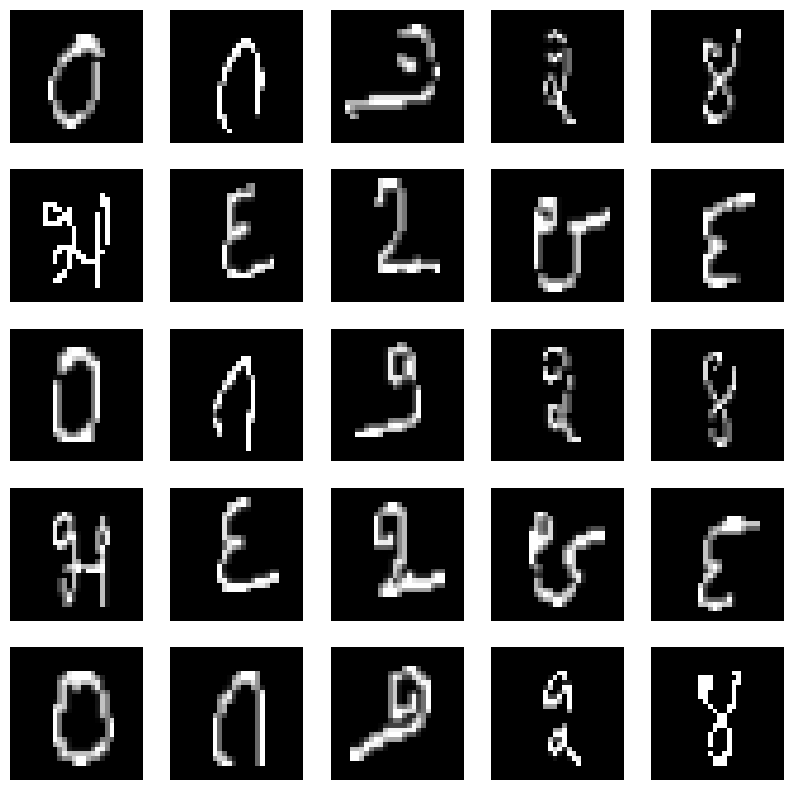

In [35]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray') #matplotlib.cm.binary
    plt.axis('off')
plt.show()


# Performing PCA to the data 

In [36]:
from sklearn.decomposition import PCA

In [37]:
#flatten the image to 2D 
x_train_scaled = x_train.reshape(x_train.shape[0],-1)
x_test_scaled = x_test.reshape(x_test.shape[0],-1)

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train_scaled)
x_test_std = std.transform(x_test_scaled)

In [39]:
#performing PCA in 10D instead of 28x28

num_components = 10
pca = PCA(n_components=num_components)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [40]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.04520619 0.0385625  0.02949627 0.02157489 0.02053332 0.01828441
 0.01499766 0.01347274 0.0127592  0.01108405]


# Decison Trees Classifier

In [41]:
 from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train_pca, y_train)
decision_tree_predictions = decision_tree_model.predict(x_test_pca)

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_dt = precision_score(y_test, decision_tree_predictions, average='macro')
recall_dt = recall_score(y_test, decision_tree_predictions, average='macro')
f1_dt = f1_score(y_test, decision_tree_predictions, average='macro')

In [59]:
print(f"Precision Score for DT : {precision_dt}")
print(f"Recall Score for DT : {recall_dt}")
print(f"F1 Score for DT : {f1_dt}")

Precsion Score for DT : 0.8038648876119968
Recall Score for DT : 0.8032999999999999
F1 Score for DT : 0.802504140535772


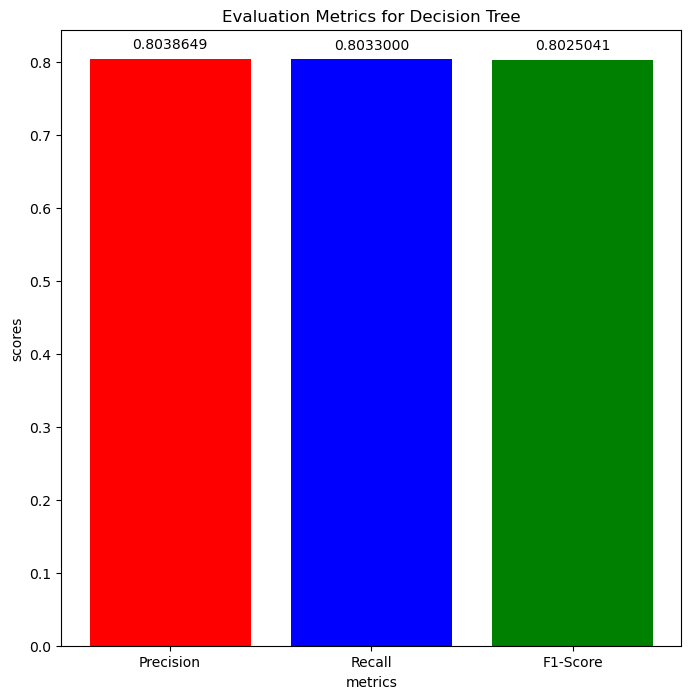

In [57]:
#metrics for DecisionTree

metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision_dt,recall_dt,f1_dt]

plt.figure(figsize= (8,8))
plt.bar(metrics,scores, color = ['red','blue','green'])
plt.xlabel('metrics')
plt.ylabel('scores')
plt.title('Evaluation Metrics for Decision Tree')

for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.7f}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

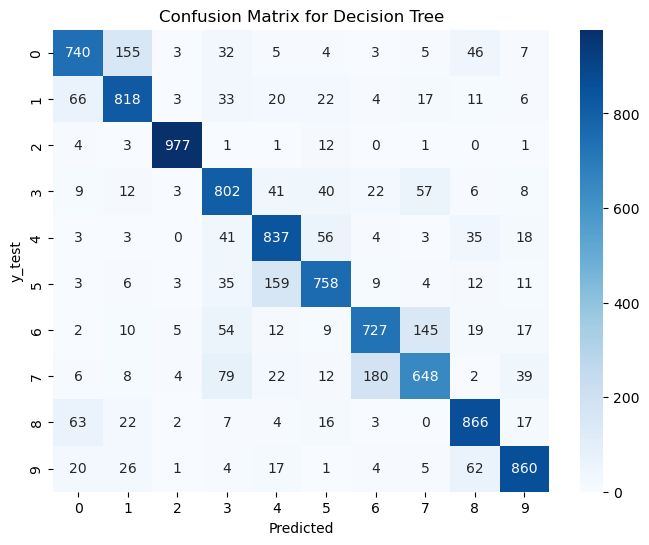

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_dt = confusion_matrix(y_test, decision_tree_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('y_test')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

roc-auc score for Decision Tree is 0.890722222222222


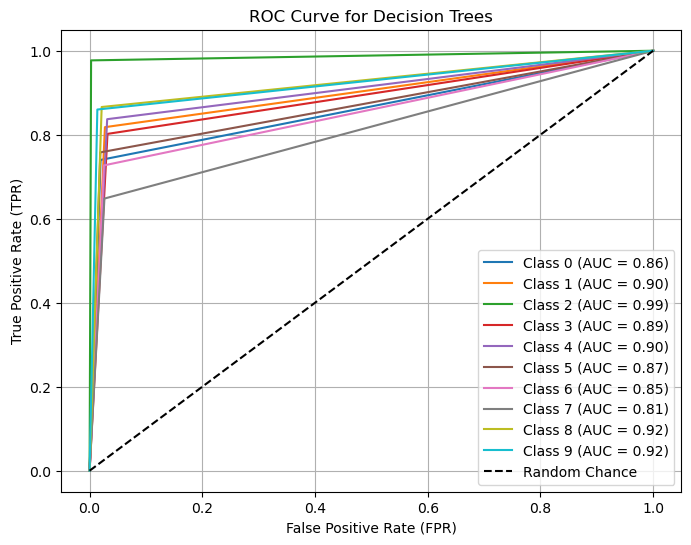

In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#convert the true labels into one hot encoded format
y_test_binarize = label_binarize(y_test,classes =range(10))

dt_tpr = dict()
dt_fpr = dict()
dt_auc = dict()
for classids in range(10):
    dt_pred_probs = decision_tree_model.predict_proba(x_test_pca)[:,classids]
    dt_fpr[classids],dt_tpr[classids], _ = roc_curve(y_test_binarize[:,classids],dt_pred_probs)
    dt_auc[classids] = auc(dt_fpr[classids],dt_tpr[classids])
    
# roc_auc = roc_auc_score(y_test_binarize,decision_tree_predictions,multi_class= 'ovr')
roc_auc = sum(dt_auc.values()) / len(dt_auc)
print(f"roc-auc score for Decision Tree is {roc_auc}")

#plotting ROC curves for Decision Trees
plt.figure(figsize=(8,6))
for classids in range(10):
    plt.plot(dt_fpr[classids],dt_tpr[classids], label='Class {} (AUC = {:.2f})'.format(classids, dt_auc[classids]))
plt.plot([0,1],[0,1], 'k--', label = 'Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()                                   


In [ ]:
## Random Forest , Naive Bayes , K-NN , Support Vector Method

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Random Forest Classifier

In [82]:
# Random Forest 
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_pca, y_train)
rf_pred = random_forest_model.predict(x_test_pca)

In [83]:
#Evaluation metrics 
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print(f"Precision Score for Random Forest is {rf_precision}")
print(f"Recall Score for Random Forest is {rf_recall}")
print(f"F1 Score for Random Forest is {rf_f1}")

Precision Score for Random Forest is 0.8686943040030165
Recall Score for Random Forest is 0.8657
F1 Score for Random Forest is 0.8652921598921605


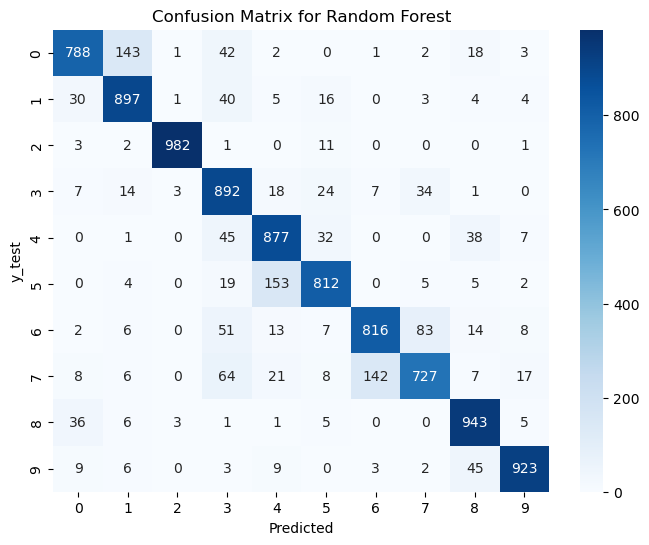

In [84]:
#Confusion matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('y_test')
plt.title("Confusion Matrix for Random Forest")
plt.show()

roc-auc score for Decision Tree is 0.9874309


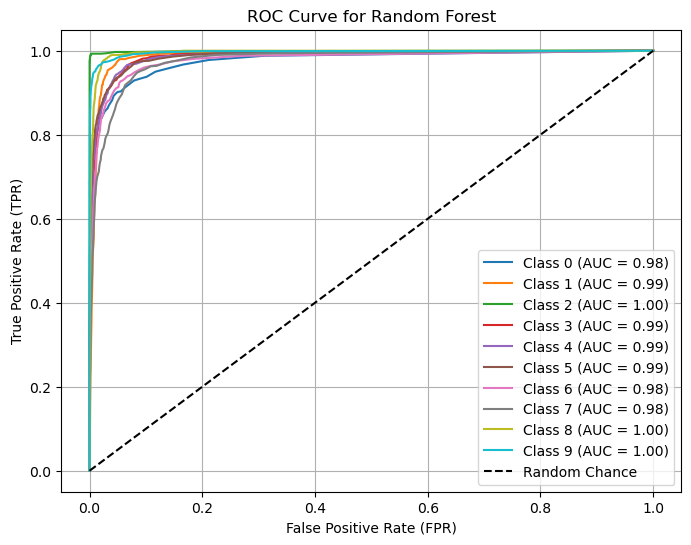

In [85]:
#ROC - AUC
rf_tpr = dict()
rf_fpr = dict()
rf_auc = dict()
for classids in range(10):
    rf_pred_probs = random_forest_model.predict_proba(x_test_pca)[:,classids]
    rf_fpr[classids],rf_tpr[classids], _ = roc_curve(y_test_binarize[:,classids],rf_pred_probs)
    rf_auc[classids] = auc(rf_fpr[classids],rf_tpr[classids])
    
roc_auc = sum(rf_auc.values()) / len(rf_auc)
print(f"roc-auc score for Decision Tree is {roc_auc}")

#plotting ROC curves for Random Forest
plt.figure(figsize=(8,6))
for classids in range(10):
    plt.plot(rf_fpr[classids],rf_tpr[classids], label='Class {} (AUC = {:.2f})'.format(classids, rf_auc[classids]))
plt.plot([0,1],[0,1], 'k--', label = 'Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()     

## Naive bayes Classifier 

In [86]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_pca, y_train)
nb_preds = naive_bayes_model.predict(x_test_pca)

In [87]:
#Evaluation metrics 
nb_precision = precision_score(y_test, nb_preds, average='macro')
nb_recall = recall_score(y_test, nb_preds, average='macro')
nb_f1 = f1_score(y_test, nb_preds, average='macro')

print(f"Precision Score for Naive Baiyes is {nb_precision}")
print(f"Recall Score for Naive Baiyes is {nb_recall}")
print(f"F1 Score for Naive Baiyes is {nb_f1}")

Precision Score for Naive Baiyes is 0.7550400653144893
Recall Score for Naive Baiyes is 0.7304
F1 Score for Naive Baiyes is 0.7310897612413235


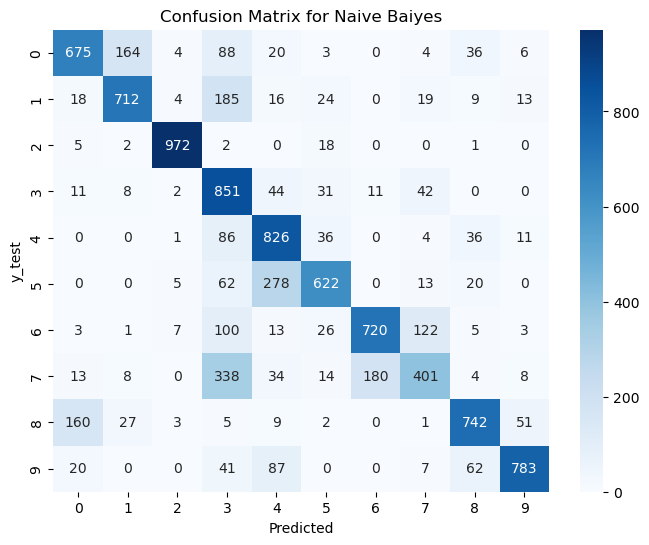

In [88]:
#Confusion matrix for Naive Baiyes
confusion_matrix_nb = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('y_test')
plt.title("Confusion Matrix for Naive Baiyes")
plt.show()

roc-auc score for Naive baiyes is 0.9570611388888889


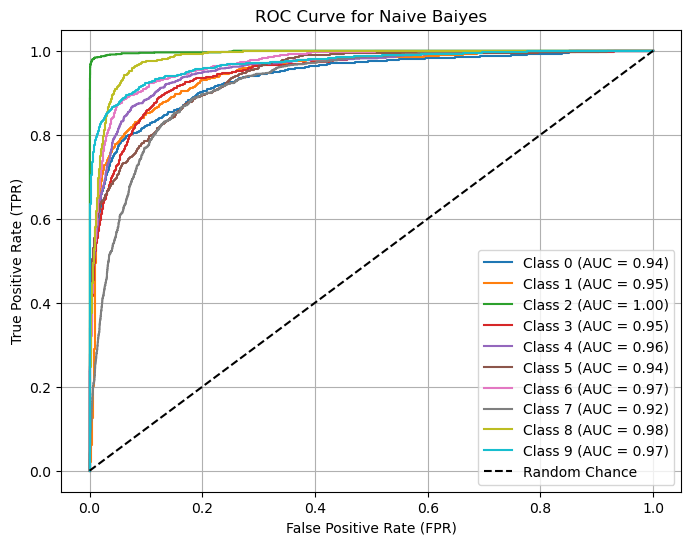

In [89]:
#ROC - AUC
nb_tpr = dict()
nb_fpr = dict()
nb_auc = dict()
for classids in range(10):
    nb_pred_probs = naive_bayes_model.predict_proba(x_test_pca)[:,classids]
    nb_fpr[classids],nb_tpr[classids], _ = roc_curve(y_test_binarize[:,classids],nb_pred_probs)
    nb_auc[classids] = auc(nb_fpr[classids],nb_tpr[classids])
    
roc_auc = sum(nb_auc.values()) / len(nb_auc)
print(f"roc-auc score for Naive baiyes is {roc_auc}")

#plotting ROC curves for Naive baiyes
plt.figure(figsize=(8,6))
for classids in range(10):
    plt.plot(nb_fpr[classids],nb_tpr[classids], label='Class {} (AUC = {:.2f})'.format(classids, nb_auc[classids]))
plt.plot([0,1],[0,1], 'k--', label = 'Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Baiyes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()     

## K-NN Classifier

Precision Score for K-NN Classifier is 0.8807653942680421
Recall Score for K-NN Classifier is 0.8779000000000001
F1 Score for K-NN Classifier is 0.8773776787898571


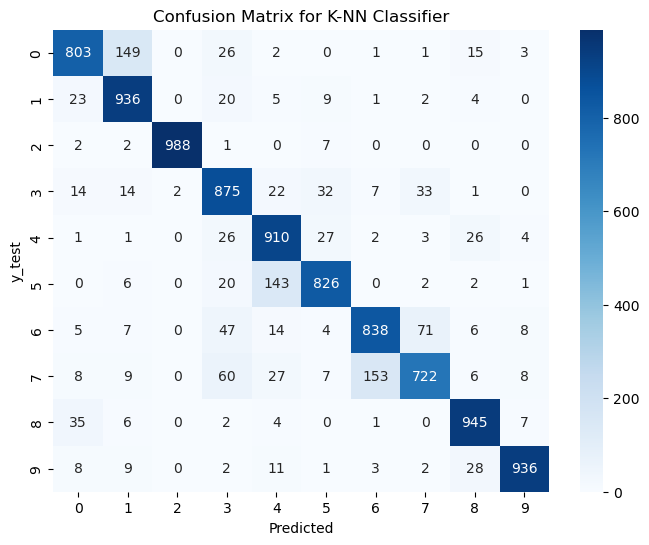

In [90]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_pca,y_train)
knn_pred = knn_model.predict(x_test_pca)

#evaluation metrics
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print(f"Precision Score for K-NN Classifier is {knn_precision}")
print(f"Recall Score for K-NN Classifier is {knn_recall}")
print(f"F1 Score for K-NN Classifier is {knn_f1}")


#confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('y_test')
plt.title("Confusion Matrix for K-NN Classifier")
plt.show()

roc-auc score for K-NN Classifier is 0.9677698388888889


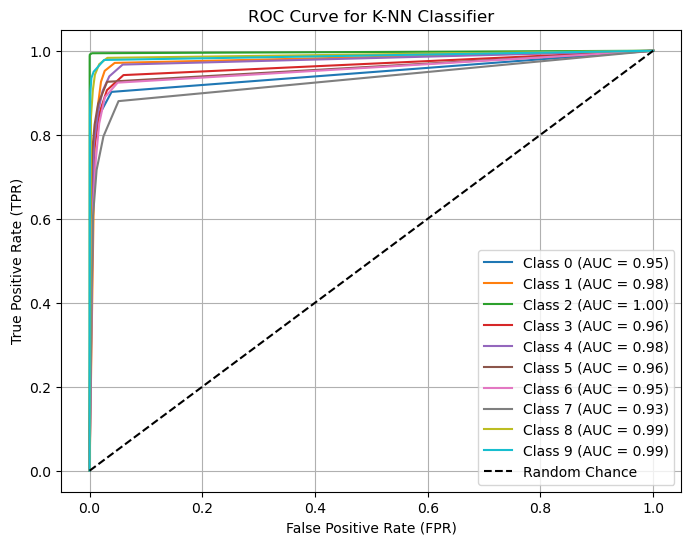

In [91]:
#ROC - AUC
knn_tpr = dict()
knn_fpr = dict()
knn_auc = dict()
for classids in range(10):
    knn_pred_probs = knn_model.predict_proba(x_test_pca)[:,classids]
    knn_fpr[classids],knn_tpr[classids], _ = roc_curve(y_test_binarize[:,classids],knn_pred_probs)
    knn_auc[classids] = auc(knn_fpr[classids],knn_tpr[classids])
    
roc_auc = sum(knn_auc.values()) / len(knn_auc)
print(f"roc-auc score for K-NN Classifier is {roc_auc}")

#plotting ROC curves for Naive baiyes
plt.figure(figsize=(8,6))
for classids in range(10):
    plt.plot(knn_fpr[classids],knn_tpr[classids], label='Class {} (AUC = {:.2f})'.format(classids, knn_auc[classids]))
plt.plot([0,1],[0,1], 'k--', label = 'Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()     

## SVM Classifier

In [95]:
svm_model = SVC(probability = True)
svm_model.fit(x_train_pca, y_train)
svm_pred = svm_model.predict(x_test_pca)

#evaluation metrics
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')

print(f"Precision Score for SVM Classifie is {svm_precision}")
print(f"Recall Score for SVM Classifier is {svm_recall}")
print(f"F1 Score for SVM Classifie is {svm_f1}")



Precision Score for SVM Classifie is 0.8841077905438951
Recall Score for SVM Classifier is 0.8809000000000001
F1 Score for SVM Classifie is 0.8805813838672567


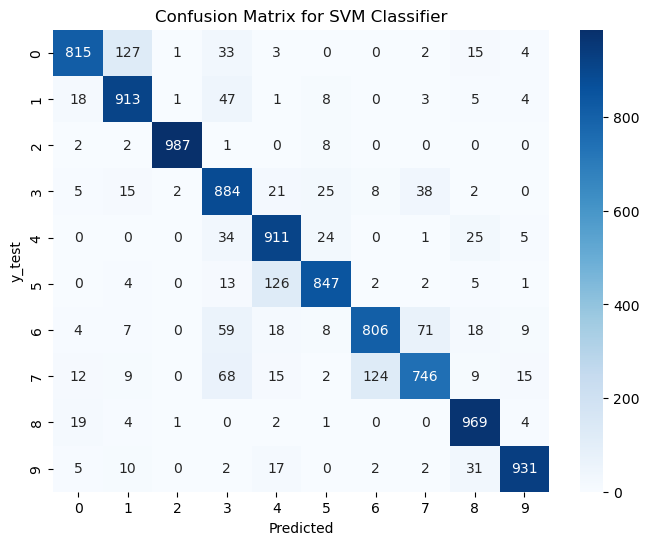

In [96]:
#confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('y_test')
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


roc-auc score for SVM Classifier is 0.9904913777777778


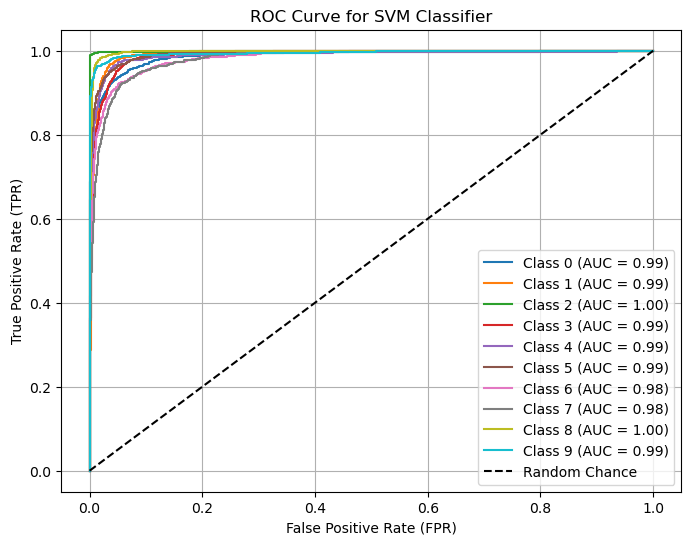

In [97]:



#ROC - AUC
svm_tpr = dict()
svm_fpr = dict()
svm_auc = dict()
for classids in range(10):
    svm_pred_probs = svm_model.predict_proba(x_test_pca)[:,classids]
    svm_fpr[classids],svm_tpr[classids], _ = roc_curve(y_test_binarize[:,classids],svm_pred_probs)
    svm_auc[classids] = auc(svm_fpr[classids],svm_tpr[classids])
    
roc_auc = sum(svm_auc.values()) / len(svm_auc)
print(f"roc-auc score for SVM Classifier is {roc_auc}")

#plotting ROC curves for Naive baiyes
plt.figure(figsize=(8,6))
for classids in range(10):
    plt.plot(svm_fpr[classids],svm_tpr[classids], label='Class {} (AUC = {:.2f})'.format(classids, svm_auc[classids]))
plt.plot([0,1],[0,1], 'k--', label = 'Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()     


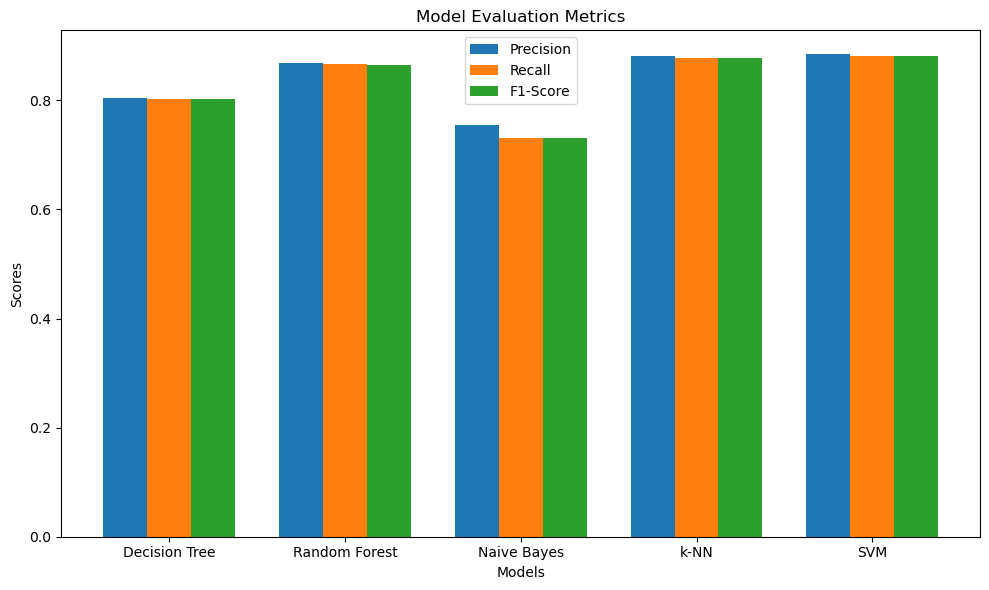

In [99]:
 ##Plotting the evaluation metrics for all classifiers

model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'k-NN', 'SVM']
precisions = [precision_dt,rf_precision,nb_precision,knn_precision,svm_precision]
recalls = [recall_dt, rf_recall, nb_recall, knn_recall, svm_recall]
f1_scores = [f1_dt, rf_f1, nb_f1, knn_f1, svm_f1]

x = np.arange(len(model_names))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting precision
ax.bar(x - width, precisions, width, label='Precision')
# Plotting recall
ax.bar(x, recalls, width, label='Recall')
# Plotting F1-score
ax.bar(x + width, f1_scores, width, label='F1-Score')

# Labeling and customization
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()

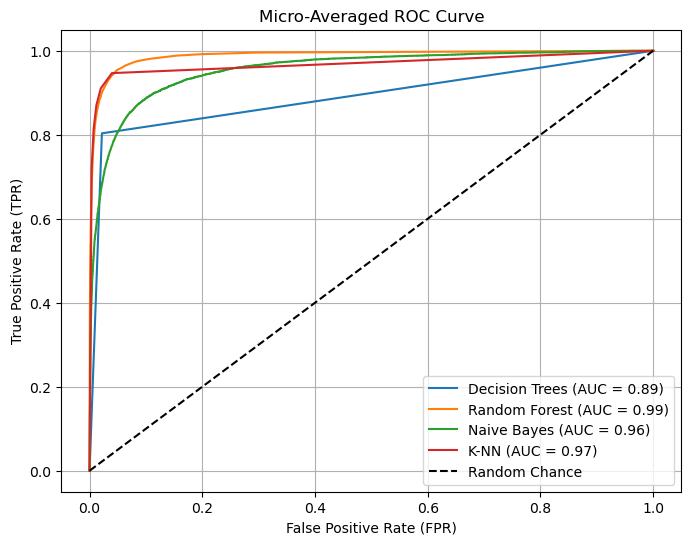

In [102]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_binarize = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = decision_tree_model.predict_proba(x_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_binarize.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = random_forest_model.predict_proba(x_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_binarize.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = naive_bayes_model.predict_proba(x_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_binarize.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_model.predict_proba(x_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_binarize.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
## When the PCA is 15

x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

# Perform PCA with 15 components
pca = PCA(n_components=15)
x_train_pca = pca.fit_transform(x_train_2d)
x_test_pca = pca.transform(x_test_2d)


def evaluate(model,x_train_pca,y_train,x_test_pca,y_test):
    model.fit(x_train_pca,y_train)
    
    y_pred = model.predict(x_test_pca)
    
    #scores
    precision = precision_score(y_test, y_pred , average= 'macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test_pca)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    

  # Return evaluation metrics
    return precision, f1, recall, roc_auc



In [111]:
#Decision Tree
decision_tree_model = DecisionTreeClassifier()
dt_precision,dt_recall,dt_f1,dt_roc_auc = evaluate(decision_tree_model,x_train_pca,y_train,x_test_pca,y_test)
print("Decision Tree precision :", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree precision : 0.8066528930204455
Decision Tree F1-score: 0.8068
Decision Tree Recall: 0.8059594714428353
Decision Tree ROC-AUC: 0.8926666666666666


In [112]:
#Random Forest 
random_forest_model = DecisionTreeClassifier()
rf_precision,rf_recall,rf_f1,rf_roc_auc = evaluate(random_forest_model,x_train_pca,y_train,x_test_pca,y_test)
print("Random Forest precision :", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest precision : 0.8034637056178896
Random Forest F1-score: 0.8036
Random Forest Recall: 0.8027100333280149
Random Forest ROC-AUC: 0.8908888888888888


In [114]:
#Naive Baiyes 

naive_baiyes_model = GaussianNB()
nb_precision,nb_recall,nb_f1,nb_roc_auc = evaluate(naive_baiyes_model,x_train_pca,y_train,x_test_pca,y_test)
print("Naive Baiyes precision :", nb_precision)
print("Naive Baiyes F1-score:", nb_f1)
print("Naive Baiyes Recall:", nb_recall)
print("Naive Baiyes ROC-AUC:", nb_roc_auc)

Naive Baiyes precision : 0.7874716434225688
Naive Baiyes F1-score: 0.7840999999999999
Naive Baiyes Recall: 0.7825497753779829
Naive Baiyes ROC-AUC: 0.9747777222222223


In [115]:
# K nearest neighbors Classifiers
knn_model = KNeighborsClassifier()
knn_precision,knn_recall,knn_f1,knn_roc_auc = evaluate(knn_model,x_train_pca,y_train,x_test_pca,y_test)
print("K nearest neighbors precision :", knn_precision)
print("K nearest neighbors F1-score:", knn_f1)
print("K nearest neighbors Recall:", knn_recall)
print("K nearest neighbors ROC-AUC:", knn_roc_auc)

K nearest neighbors precision : 0.912492557867376
K nearest neighbors F1-score: 0.909
K nearest neighbors Recall: 0.9083532900141081
K nearest neighbors ROC-AUC: 0.9785339166666667
